In [ ]:
import asdf
import numpy as np
import matplotlib.pyplot as plt
from mwgcs import Einasto, Simulation
sim_dir = "/fs/ddn/sdf/group/kipac/g/cosmo/ki21/phil1/simulations/ZoomIns/SymphonyMilkyWay/Halo023"
sim = Simulation(sim_dir)

from scipy.interpolate import interp1d

In [2]:
af = asdf.open('einasto_params_Halo023.asdf')

In [7]:
keys = ['alpha', 'logrho', 'rs']

In [12]:
alpha, logrho, rs = af['alpha'][0, :], af['logrho'][0, :], af['rs'][0, :]

In [20]:
profiles = [Einasto(alpha[i], rs[i], logrho[i]) for i in np.arange(236)]
_r = np.logspace(-1, 2, 50)
densities = [profile.density(_r) for profile in profiles]

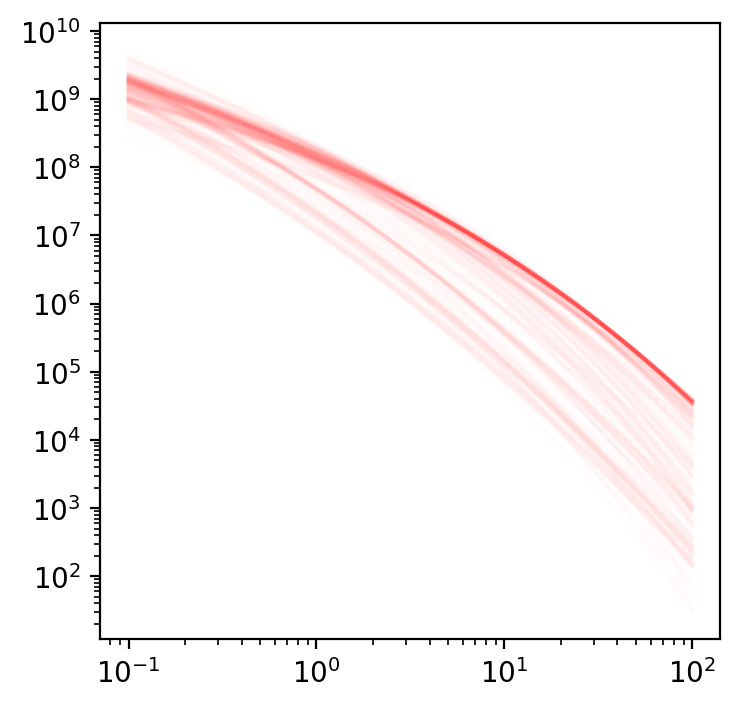

In [26]:
fig, ax = plt.subplots(dpi=200, figsize=(4,4))
[ax.loglog(_r, density, alpha=.01, c='r') for density in densities]
plt.show()

## interpolate

In [46]:
int_alpha = interp1d(sim.scale_factors, alpha, kind='quadratic')
int_logrho = interp1d(sim.scale_factors, logrho, kind='quadratic')
int_rs = interp1d(sim.scale_factors, rs, kind='quadratic')

int_alpha_lin = interp1d(sim.scale_factors, alpha, kind='linear')
int_logrho_lin = interp1d(sim.scale_factors, logrho, kind='linear')
int_rs_lin = interp1d(sim.scale_factors, rs, kind='linear')

int_alpha_cub = interp1d(sim.scale_factors, alpha, kind='cubic')
int_logrho_cub = interp1d(sim.scale_factors, logrho, kind='cubic')
int_rs_cub = interp1d(sim.scale_factors, rs, kind='cubic')

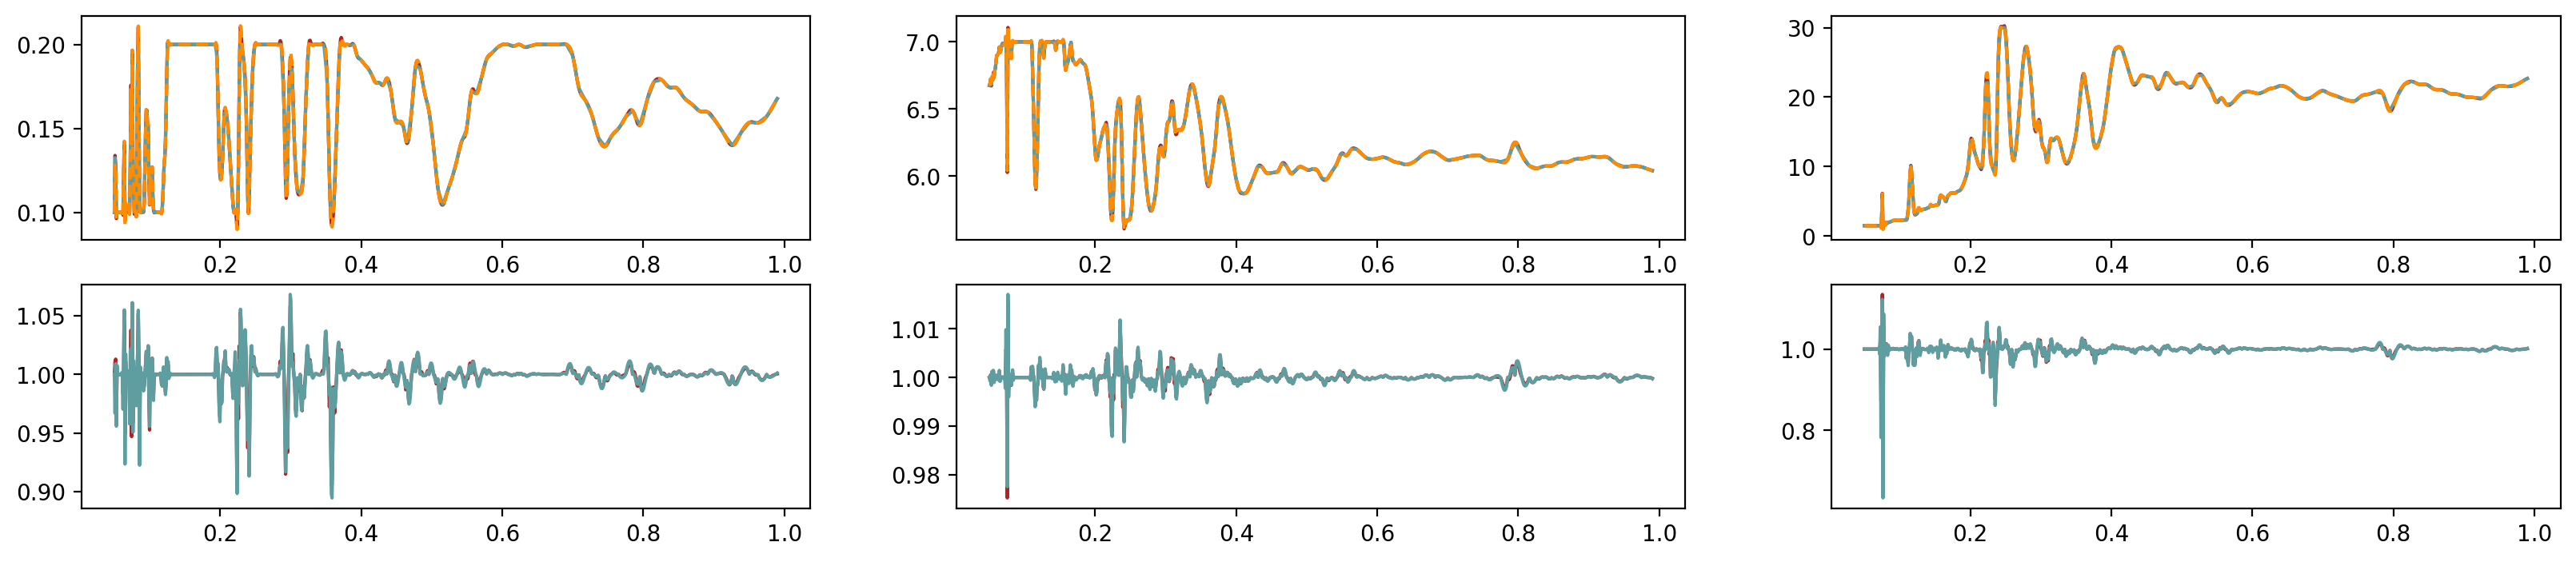

In [54]:
_a = np.linspace(.05, .99, 1000)
fig, ax = plt.subplots(2, 3, dpi=200, figsize=(20,4))
ax[0, 0].plot(_a, int_alpha(_a), c='firebrick')
ax[0, 0].plot(_a, int_alpha_lin(_a), c='cadetblue')
ax[0, 0].plot(_a, int_alpha_cub(_a), c='darkorange', ls='--')

ax[0, 1].plot(_a, int_logrho(_a), c='firebrick')
ax[0, 1].plot(_a, int_logrho_lin(_a), c='cadetblue')
ax[0, 1].plot(_a, int_logrho_cub(_a), c='darkorange', ls='--')

ax[0, 2].plot(_a, int_rs(_a), c='firebrick')
ax[0, 2].plot(_a, int_rs_lin(_a), c='cadetblue')
ax[0, 2].plot(_a, int_rs_cub(_a), c='darkorange', ls='--')

ax[1, 0].plot(_a, int_alpha(_a) / int_alpha_lin(_a), c='firebrick')
ax[1, 0].plot(_a, int_alpha_cub(_a) / int_alpha_lin(_a), c='cadetblue')

ax[1, 1].plot(_a, int_logrho(_a) / int_logrho_lin(_a), c='firebrick')
ax[1, 1].plot(_a, int_logrho_cub(_a) / int_logrho_lin(_a), c='cadetblue')

ax[1, 2].plot(_a, int_rs(_a)/ int_rs_lin(_a), c='firebrick')
ax[1, 2].plot(_a, int_rs_cub(_a)/ int_rs_lin(_a), c='cadetblue')
plt.show()

In [ ]:
sim.